In [1]:
%matplotlib inline
import librosa 
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y, sr = librosa.load(librosa.util.example_audio_file())

### Dynamic programming beat tracker
Beats are detected in three stages:
1. Measure onset strength
2. Estimate tempo from onset correlation
3. Pick peaks in onset strength approximately consistent with estimated tempo

In [3]:
tempo1, beats1 = librosa.beat.beat_track(y=y, sr=sr)
print(beats1)

[   5   24   43   63   83  103  122  142  162  182  202  222  242  262  281
  301  321  341  361  382  401  421  441  461  480  500  520  540  560  580
  600  620  639  658  678  698  718  737  758  777  798  817  837  857  877
  896  917  936  957  976  996 1016 1036 1055 1075 1095 1116 1135 1155 1175
 1195 1214 1234 1254 1275 1295 1315 1334 1354 1373 1394 1414 1434 1453 1473
 1493 1513 1532 1553 1573 1593 1612 1632 1652 1672 1691 1712 1732 1752 1771
 1791 1811 1831 1850 1871 1890 1911 1931 1951 1971 1990 2010 2030 2050 2070
 2090 2110 2130 2150 2170 2190 2209 2229 2249 2269 2289 2309 2328 2348 2368
 2388 2408 2428 2448 2468 2488 2508 2527 2547]


In [4]:
onset_env = librosa.onset.onset_strength(y, sr=sr, aggregate=np.median)
tempo2, beats2 = librosa.beat.beat_track(onset_envelope=onset_env,sr=sr)
print(beats2)

[   5   24   43   63   83  103  122  142  162  182  202  222  242  262  281
  301  321  341  361  382  401  421  441  461  480  500  520  540  560  580
  600  620  639  658  678  698  718  737  758  777  798  817  837  857  877
  896  917  936  957  976  996 1016 1036 1055 1075 1095 1116 1135 1155 1175
 1195 1214 1234 1254 1275 1295 1315 1334 1354 1373 1394 1414 1434 1453 1473
 1493 1513 1532 1553 1573 1593 1612 1632 1652 1672 1691 1712 1732 1752 1771
 1791 1811 1831 1850 1871 1890 1911 1931 1951 1971 1990 2010 2030 2050 2070
 2090 2110 2130 2150 2170 2190 2209 2229 2249 2269 2289 2309 2328 2348 2368
 2388 2408 2428 2448 2468 2488 2508 2527 2547]


In [5]:
print(np.array_equal(beats1,beats2))

True


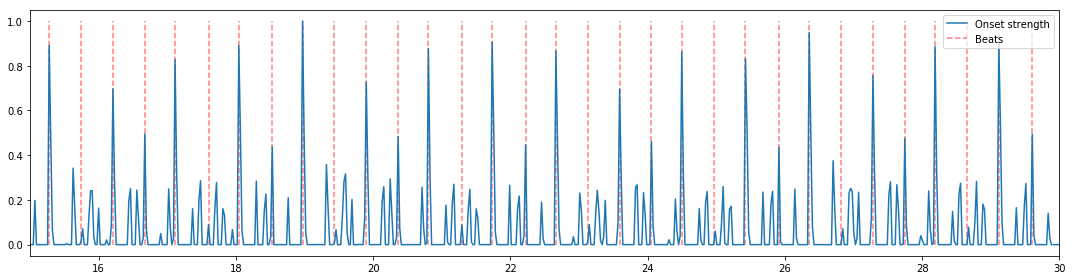

In [6]:
hop_length = 512
plt.figure(figsize=(15, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)),sr=sr, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env),label='Onset strength')
plt.vlines(times[beats1], 0, 1, alpha=0.5, color='r',linestyle='--', label='Beats')
# beats = librosa.beat.beat_track(y=y, sr=sr)
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 15-second window
plt.xlim(15, 30)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()